# NRAM Implementation

## Initial Setup

### Import libraries

In [0]:
from __future__ import print_function

import numpy as np
import tensorflow as tf

from tensorflow.keras import layers

import matplotlib.pyplot as plt

tf.enable_eager_execution()

### Create Modules / Gates

In [0]:
def zeroModule(a, M):
    zero = np.asarray([0])
    return tf.one_hot(zero, M)

In [0]:
def oneModule(a, M):
    one = np.asarray([1])
    return tf.one_hot(one, M)

In [0]:
def twoModule(a, M):
    two = np.asarray([2])
    return tf.one_hot(two, M)

In [0]:
def incModule(a, M):
  return tf.roll(a, shift=1, axis=1)

In [0]:
def addModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  addVal = tf.mod(tf.add(aVal, bVal), a.shape[1])
  return tf.one_hot(addVal, a.shape[1])

In [0]:
def subModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  subtractVal = tf.mod(tf.subtract(aVal, bVal), M)
  return tf.one_hot(subtractVal, M)

In [0]:
def decModule(a, M):
  return tf.roll(a, shift=-1, axis=1)

In [0]:
def lessModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  lessVal = tf.less(aVal, bVal)
  return tf.one_hot(tf.cast(lessVal, tf.int64), M)

In [0]:
def lessOrEqualThenModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  lessVal = tf.less_equal(aVal, bVal)
  return tf.one_hot(tf.cast(lessVal, tf.int64), M)

In [0]:
def equalModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  equalVal = tf.equal(aVal, bVal)
  return tf.one_hot(tf.cast(equalVal, tf.int64), M)

In [0]:
def minimumModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  minimumVal = tf.minimum(aVal, bVal)
  return tf.one_hot(tf.cast(minimumVal, tf.int64), M)

In [0]:
def maximumModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  maximumVal = tf.maximum(aVal, bVal)
  return tf.one_hot(tf.cast(maximumVal, tf.int64), M)

### Test Modules

In [0]:
#Note : Temporary M Values
M = 4

In [0]:
incModule(tf.one_hot([4, 9], M), M)

<tf.Tensor: id=7, shape=(2, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [0]:
decModule(tf.one_hot([4, 9], M), M)

<tf.Tensor: id=16, shape=(2, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [0]:
addModule(tf.one_hot([7, 8], M), tf.one_hot([6, 7], M), M)

<tf.Tensor: id=38, shape=(2, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)>

In [0]:
addModule(np.array([[0., 0., 0., 0.5, 0.5]]), np.array([[0., 0., 0., 1., 0.]]), M)

<tf.Tensor: id=52, shape=(1, 5), dtype=float32, numpy=array([[0., 1., 0., 0., 0.]], dtype=float32)>

**Note: One hot of values greater than M is 0**

In [0]:
tf.one_hot([7, 8], M)

<tf.Tensor: id=58, shape=(2, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [0]:
subModule(tf.one_hot([4, 8], M), tf.one_hot([6, 7], M), M)

<tf.Tensor: id=80, shape=(2, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)>

In [0]:
incModule(tf.one_hot([4, 9], M), M)

<tf.Tensor: id=89, shape=(2, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [0]:
decModule(tf.one_hot([4, 9], M), M)

<tf.Tensor: id=98, shape=(2, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [0]:
lessModule(tf.one_hot([8, 5], M), tf.one_hot([6, 7], M), M)

<tf.Tensor: id=119, shape=(2, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)>

In [0]:
lessOrEqualThenModule(tf.one_hot([8, 5], M), tf.one_hot([8, 7], M), M)

<tf.Tensor: id=140, shape=(2, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)>

In [0]:
equalModule(tf.one_hot([8, 5], M), tf.one_hot([8, 7], M), M)

<tf.Tensor: id=161, shape=(2, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)>

In [0]:
minimumModule(tf.one_hot([8, 5], M), tf.one_hot([8, 7], M), M)

<tf.Tensor: id=181, shape=(2, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)>

### Circuit Implementation

In [0]:
def dotProduct(a, b):
  aT = tf.transpose(a)
  aT = tf.reshape(aT, [a.shape[0],a.shape[2],a.shape[1]])
  return tf.tensordot(aT, b, axes=1)

In [0]:
a = np.array([[
    [1., 2., 3.],
    [4., 5., 6.],
]])

b = np.array([1., 0.])
dotProduct(a, b)

<tf.Tensor: id=199, shape=(1, 3), dtype=float64, numpy=array([[1., 2., 3.]])>

#### Gates List

In [0]:
gates = [incModule, decModule, addModule]

In [0]:
gates[0](tf.one_hot([1, 9], M), M)

<tf.Tensor: id=208, shape=(2, 4), dtype=float32, numpy=
array([[0., 0., 1., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

#### Gate Controller Output

Runs the input which is selected by controller values into the gate passed and returns the output from the gate

In [0]:
def gateOutput(gate, inputs, controllerValues, M):
  if(controllerValues.shape[0] > 1):
    gateInputA = dotProduct(inputs, controllerValues[0])
    gateInputB = dotProduct(inputs, controllerValues[1])
    output = gate(gateInputA, gateInputB, M)
  else:
    gateInputA = dotProduct(inputs, controllerValues[0])
    output = gate(gateInputA, M)
  
  return output

In [0]:
ip = np.array([[
  [1., 0., 0., 0., 0.],
  [0., 1., 0., 0., 0.],
  [0., 0., 0., 1., 0.],
  [0., 1., 0., 0., 0.]
 ]])

In [0]:
cp = np.array([[0., 0., 0., 1.],
              [0., 0., 1., 0.]])
cp.shape

(2, 4)

Run gate to check output - Adds ip 4th value with 3rd value

In [0]:
outputVal = gateOutput(gates[2], ip, cp, M)

In [0]:
outputVal

<tf.Tensor: id=254, shape=(1, 5), dtype=float32, numpy=array([[0., 0., 0., 0., 1.]], dtype=float32)>

In [0]:
tf.dtypes.cast(ip, tf.float32)

<tf.Tensor: id=257, shape=(1, 4, 5), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.]]], dtype=float32)>

For adding the output to the registers

In [0]:
tf.concat([ip, [outputVal]], axis=1)

<tf.Tensor: id=263, shape=(1, 5, 5), dtype=float64, numpy=
array([[[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]]])>

In [0]:
zeroModule([], M)

<tf.Tensor: id=269, shape=(1, 4), dtype=float32, numpy=array([[1., 0., 0., 0.]], dtype=float32)>

#### Input Register

In [0]:
def registerValueModule(a):
    aVal = np.asarray([a])
    return tf.one_hot(aVal, M)

In [0]:
registerValueModule(2)

<tf.Tensor: id=275, shape=(1, 4), dtype=float32, numpy=array([[0., 0., 1., 0.]], dtype=float32)>

In [0]:
registers = tf.concat([registerValueModule(0), registerValueModule(1), registerValueModule(3)], axis=0)

**Registers = [0,1,3]**

In [0]:
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

In [0]:
registers

<tf.Tensor: id=295, shape=(1, 3, 4), dtype=float32, numpy=
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]]], dtype=float32)>

#### Update data

In [0]:
def runTimeStep(gates, registers, controllerValues):
  for i in range(len(gates)):
    output = gateOutput(gates[i], registers, controllerValues[i], M)
    registers = tf.concat([registers, [output]], axis=1)

  output_registers = []
  for i in range(len(gates), len(controllerValues)):
    output = dotProduct(registers, controllerValues[i])
    output_registers.append(output)
  
  output_registers = tf.stack(output_registers, axis=1)
  
  return output_registers

**Circuit Testing 1**

In [0]:
# registers = [2, 1, 3]
registers = tf.concat([registerValueModule(2), registerValueModule(1), registerValueModule(3)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("Input registers: ", tf.argmax(registers, axis=2))

# Gatest -> Increment, Decrement, Addition
gates = [incModule, decModule, addModule]

# Increment input r1 -> decrement output o1 -> add output o2 + input r1
controllerValues_ = [
    [[0, 1, 0]],
    [[0, 0, 0, 1]],
    [[0, 0, 0, 0, 1],
     [0, 1, 0, 0, 0]]
]

# Save the input r2 -> output r0, input r0 -> output r1, last gate output -> output r2
registerCoefficients_ = [
    [0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1]
]

controllerValues = []
for value in controllerValues_ + registerCoefficients_:
  controllerValues.append(tf.dtypes.cast(value, tf.float32))

# Calling the function to run the complete circuit
output_registers = runTimeStep(gates, registers, controllerValues)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))

Input registers:  tf.Tensor([[2 1 3]], shape=(1, 3), dtype=int64)

output_registers:
 tf.Tensor(
[[[0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]], shape=(1, 3, 4), dtype=float32)

output_registers:
 tf.Tensor([[3 2 2]], shape=(1, 3), dtype=int64)


**Circuit Testing 2**

In [0]:
gates = [incModule]

controllerValues_ = [
    [[1, 0, 0]]
]

registerCoefficients_ = [
    [0, 0, 0, 1],
    [0, 1, 0, 0],
    [0, 0, 1, 0]
]

controllerValues = []
for value in controllerValues_ + registerCoefficients_:
  controllerValues.append(tf.dtypes.cast(value, tf.float32))

# First set of input values
registers = tf.concat([registerValueModule(1), registerValueModule(1), registerValueModule(3)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("Input register set 1: ", tf.argmax(registers, axis=2))

print("\nRunning input r0 -> increment -> output r0")

# Calling the function to run the complete circuit
output_registers = runTimeStep(gates, registers, controllerValues)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))


# Second set of input values
registers = tf.concat([registerValueModule(2), registerValueModule(1), registerValueModule(3)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("\n\nInput register set 2: ", tf.argmax(registers, axis=2))

print("\nRunning input r0 -> increment -> output r0")
# Calling the function to run the complete circuit
output_registers = runTimeStep(gates, registers, controllerValues)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))

Input register set 1:  tf.Tensor([[1 1 3]], shape=(1, 3), dtype=int64)

Running input r0 -> increment -> output r0

output_registers:
 tf.Tensor(
[[[0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 1.]]], shape=(1, 3, 4), dtype=float32)

output_registers:
 tf.Tensor([[2 1 3]], shape=(1, 3), dtype=int64)


Input register set 2:  tf.Tensor([[2 1 3]], shape=(1, 3), dtype=int64)

Running input r0 -> increment -> output r0

output_registers:
 tf.Tensor(
[[[0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 0. 0. 1.]]], shape=(1, 3, 4), dtype=float32)

output_registers:
 tf.Tensor([[3 1 3]], shape=(1, 3), dtype=int64)


### NRAM Controller Neural Network Model

In [0]:
def runTimeStepNN(gates, registers, controllerValues):
  for i in range(len(gates)):
    output = gateOutput(gates[i], registers, controllerValues[i], M)
    registers = tf.concat([registers, [output]], axis=1)

  output_registers = []
  for i in range(len(gates), len(controllerValues)):
    output = dotProduct(registers, controllerValues[i][0])
    output_registers.append(output)
  
  output_registers = tf.stack(output_registers, axis=1)
  
  return output_registers

In [0]:
class NRAMController(tf.keras.Model):
   def __init__(self, hidden_dimensions=80, output_dimensions=[3, 4, 4, 4]):
      super(NRAMController, self).__init__()
      self.Hidden1 = tf.keras.layers.Dense(hidden_dimensions, input_shape=(3,), use_bias=True, activation="relu")
      self.Hidden2 = tf.keras.layers.Dense(hidden_dimensions, input_shape=(hidden_dimensions,), use_bias=True, activation="relu")

      self.Output = []
      self.output_dimensions = output_dimensions

      # Gate Inputs Controller values and Register Output Controller Values
      for i in output_dimensions:
        self.Output.append(tf.keras.layers.Dense(i, input_shape=(hidden_dimensions,), use_bias=True, activation="softmax"))

      self.CompletedStatus = tf.keras.layers.Dense(1, input_shape=(hidden_dimensions,), use_bias=True, activation="sigmoid")
   
   def call(self, input_registers):
      # hidden layers
      hidden1 = self.Hidden1(input_registers)
      hidden2 = self.Hidden2(hidden1)
      
      # To get controller values
      output = []
      for i in range(len(self.output_dimensions)):
        output.append(self.Output[i](hidden2))

      # final completed status
      completed = self.CompletedStatus(hidden2)

      return output, completed

#### Example Implementation

In [0]:
# Example with one gate and 3 input/output registers
outputVals = [3, 4, 4, 4]

# Creating instance of the contoller network
nramController = NRAMController(output_dimensions=[3, 4, 4, 4]);

In [0]:
# Running the controller
coEffTest, completedStatus = nramController(tf.Variable(tf.ones((1,3))))

print("\nThe output from the neural network controller without training \n")
coEffTest

Instructions for updating:
Colocations handled automatically by placer.

The output from the neural network controller without training 



[<tf.Tensor: id=776, shape=(1, 3), dtype=float32, numpy=array([[0.3421605 , 0.38040218, 0.27743736]], dtype=float32)>,
 <tf.Tensor: id=803, shape=(1, 4), dtype=float32, numpy=array([[0.26405033, 0.23185481, 0.20055304, 0.30354178]], dtype=float32)>,
 <tf.Tensor: id=830, shape=(1, 4), dtype=float32, numpy=array([[0.2552609 , 0.30047518, 0.14777407, 0.29648986]], dtype=float32)>,
 <tf.Tensor: id=857, shape=(1, 4), dtype=float32, numpy=array([[0.32035252, 0.26037046, 0.18721005, 0.23206699]], dtype=float32)>]

##### Input Controller Values is the output of NN being applied to the circuit for one time step

In [0]:
gates = [incModule]

# First set of input values
registers = tf.concat([registerValueModule(1), registerValueModule(1), registerValueModule(3)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("Input register set 1: ", tf.argmax(registers, axis=2))

print("\nRunning input r0 -> increment -> output r0")

# Calling the function to run the complete circuit
output_registers = runTimeStepNN(gates, registers, coEffTest)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))

Input register set 1:  tf.Tensor([[1 1 3]], shape=(1, 3), dtype=int64)

Running input r0 -> increment -> output r0

output_registers:
 tf.Tensor(
[[[0.08421383 0.49590516 0.21932796 0.20055304]
  [0.08225737 0.55573606 0.2142325  0.14777407]
  [0.06438405 0.580723   0.16768295 0.18721005]]], shape=(1, 3, 4), dtype=float32)

output_registers:
 tf.Tensor([[1 1 1]], shape=(1, 3), dtype=int64)


## Implementation

In [0]:
input_data = []
target_data = []
register_data = []

input_data.append([
  np.eye(4)[0],
  np.eye(4)[3],
  np.eye(4)[3]
])
register_data.append([
    1-np.eye(4)[0][0],
    1-np.eye(4)[3][0],
    1-np.eye(4)[3][0]
])
target_data.append([
  np.roll(np.eye(4)[0], 1),
  np.eye(4)[3],
  np.eye(4)[3]
])


input_data.append([
  np.eye(4)[0],
  np.eye(4)[1],
  np.eye(4)[3]
])
register_data.append([
    1-np.eye(4)[0][0],
    1-np.eye(4)[1][0],
    1-np.eye(4)[3][0]
])
target_data.append([
  np.roll(np.eye(4)[0], 1),
  np.eye(4)[1],
  np.eye(4)[3]
])


input_data.append([
  np.eye(4)[3],
  np.eye(4)[2],
  np.eye(4)[3]
])
register_data.append([
    1-np.eye(4)[3][0],
    1-np.eye(4)[2][0],
    1-np.eye(4)[3][0]
])
target_data.append([
  np.roll(np.eye(4)[3], 1),
  np.eye(4)[2],
  np.eye(4)[3]
])

#Adding this entry causes the output of first gate to be around 50% prob
# input_data.append([
#   np.eye(4)[3],
#   np.eye(4)[2],
#   np.eye(4)[1]
# ])
# register_data.append([
#     1-np.eye(4)[3][0],
#     1-np.eye(4)[2][0],
#     1-np.eye(4)[1][0]
# ])
# target_data.append([
#   np.roll(np.eye(4)[3], 1),
#   np.eye(4)[2],
#   np.eye(4)[1]
# ])


In [0]:
dataset = tf.data.Dataset.from_tensor_slices((
   input_data,
   register_data,
   target_data
))

# Divide to 32 batches
batches = 1
dataset = dataset.repeat(100).shuffle(buffer_size=10000).batch(batches)

In [0]:
dataset

<DatasetV1Adapter shapes: ((?, 3, 4), (?, 3), (?, 3, 4)), types: (tf.float64, tf.float64, tf.float64)>

In [0]:
optimizer = tf.train.AdamOptimizer(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08
)

In [0]:
# for (batch, (input_data, register_data, target_data)) in enumerate(dataset):
#   print(input_data[0], register_data[0], target_data[0])

In [0]:
def gateOutput1(gate, inputs, controllerValues, M):
  gateInputA = dotProduct(inputs, controllerValues[0])
  output = gate(gateInputA, M)
  output = tf.reshape(output, [output.shape[0], 1, output.shape[1]])
  return output

In [0]:
def trainNeuralNetwork(dataset):
  epochs = 2
  loss_history = []
  max_timesteps = 5
  reg_lambda = 0.1
  num_registers = 3
  nramController = NRAMController(output_dimensions=[3, 4, 4, 4]);

  for epoch in range(epochs):
      for (batch, (input_data, register_data, target_data)) in enumerate(dataset):
          loss = 0
          cost = 0
          cum_prob_complete = 0
          prob_incomplete = 1
          status = 1
          
          with tf.GradientTape() as tape:
            registers = input_data
            for timestep in range(max_timesteps):
              controller, status = nramController(tf.dtypes.cast(register_data, "float32"))

              for i in range(len(gates)):
                output = gateOutput1(gates[i], tf.dtypes.cast(registers, "float32"), tf.dtypes.cast(controller[i], tf.float32), M)
                registers = tf.concat([tf.dtypes.cast(registers, "float32"), output], axis=1)

              output_registers = []
              for i in range(len(gates), len(controller)):
                output = dotProduct(registers, controller[i][0])
                output_registers.append(output)

              output_registers = tf.stack(output_registers, axis=1)
              registers = output_registers
              if timestep == max_timesteps:
                  prob_complete = 1 - cum_prob_complete
              else:
                  prob_complete = status * prob_incomplete

              # Update the probability that the computation isn't complete
              prob_incomplete *= 1 - status

              # Accumulate the probability that a result has been produced.
              cum_prob_complete += prob_complete

              # Cost for this timestep.
              unscaled_cost = 0

              # Add epsilon to every log to avoid having inf in costs.
              epsilon = tf.constant(1e-35, shape=[output_registers.shape[0], output_registers.shape[2]])

              for r in range(num_registers):
                  mask = target_data[:, r]
                  loss = tf.math.reduce_sum((tf.dtypes.cast(mask, "float32" ) * tf.math.log(tf.math.add(tf.dtypes.cast(output_registers[:, r, :], "float32" ), epsilon))), axis=1)
                  unscaled_cost += tf.reshape(loss, [loss.shape[0], 1])

              scaled_cost = prob_complete * unscaled_cost
              cost -= scaled_cost
            final_cost = tf.math.reduce_sum(cost)

          batch_loss = (final_cost / batches)
          
          # store the loss history 
          loss_history.append(batch_loss.numpy())

          # fetch the trainable variables
          variables = nramController.variables

          # calculate the gradient
          grads = tape.gradient(final_cost, variables)

          # update the weights of the network
          optimizer.apply_gradients(zip(grads, variables), global_step=tf.train.get_or_create_global_step())
      
          print("\nEpoch ", epoch, " final_cost: ", final_cost, " Batch Loss: ", batch_loss)
      if batch_loss > 100:
        print("\n\tExit: Epoch ", epoch, " final_cost: ", final_cost, " Batch Loss: ", batch_loss)
        return loss_history, nramController
  return loss_history, nramController

In [0]:
## Run me
for _ in range(10):
  loss_history, model = trainNeuralNetwork(dataset)
  print("\nCompleted iteration: ", _, " final loss: ", loss_history[-1])
  if loss_history[-1] < 1:
    break


Epoch  0  final_cost:  tf.Tensor(3.390859, shape=(), dtype=float32)  Batch Loss:  tf.Tensor(3.390859, shape=(), dtype=float32)

Epoch  0  final_cost:  tf.Tensor(3.4384806, shape=(), dtype=float32)  Batch Loss:  tf.Tensor(3.4384806, shape=(), dtype=float32)

Epoch  0  final_cost:  tf.Tensor(3.3812425, shape=(), dtype=float32)  Batch Loss:  tf.Tensor(3.3812425, shape=(), dtype=float32)

Epoch  0  final_cost:  tf.Tensor(3.281523, shape=(), dtype=float32)  Batch Loss:  tf.Tensor(3.281523, shape=(), dtype=float32)

Epoch  0  final_cost:  tf.Tensor(3.2420697, shape=(), dtype=float32)  Batch Loss:  tf.Tensor(3.2420697, shape=(), dtype=float32)

Epoch  0  final_cost:  tf.Tensor(3.1990552, shape=(), dtype=float32)  Batch Loss:  tf.Tensor(3.1990552, shape=(), dtype=float32)

Epoch  0  final_cost:  tf.Tensor(3.1546266, shape=(), dtype=float32)  Batch Loss:  tf.Tensor(3.1546266, shape=(), dtype=float32)

Epoch  0  final_cost:  tf.Tensor(3.1091835, shape=(), dtype=float32)  Batch Loss:  tf.Tensor(

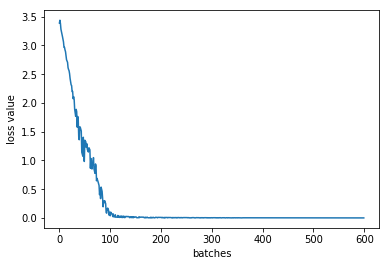

In [0]:
plt.plot(loss_history)

plt.ylabel('loss value')
plt.xlabel('batches')

plt.show()

**Note: Neural Network output oscillates**

## Test Model

In [0]:
input_sample = np.array(
  [[
    np.eye(4)[1],
    np.eye(4)[0],
    np.eye(4)[1]
  ]]
)

In [0]:
register_sample = np.array(
  [[1., 0., 1.]]
)

In [0]:
input_sample

array([[[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]]])

In [0]:
epochs = 10
loss_history = []
max_timesteps = 2
reg_lambda = 0.1
num_registers = 3

for timestep in range(max_timesteps):
  print("\ntimestep ", timestep)
  print("Input registers ", tf.argmax(input_sample, axis=2))
  controller, status = model(tf.dtypes.cast(register_sample, "float32"))
  print("\ncontroller ")
  for val in controller:
    print(val)
  print("\nstatus ", status)
  registers = input_sample
  for i in range(len(gates)):
    output = gateOutput1(gates[i], tf.dtypes.cast(registers, "float32"), tf.dtypes.cast(controller[i], tf.float32), M)
    print("\noutput-gate ", output)
    registers = tf.concat([tf.dtypes.cast(registers, "float32"), output], axis=1)

  output_registers = []
  for i in range(len(gates), len(controller)):
    output = dotProduct(registers, controller[i][0])
    output_registers.append(output)

  output_registers = tf.stack(output_registers, axis=1)
  print("\noutput register\n", output_registers)
  print("\noutput_registers-argmax\n", tf.argmax(output_registers, axis=2))



timestep  0
Input registers  tf.Tensor([[1 0 1]], shape=(1, 3), dtype=int64)

controller 
tf.Tensor([[0.51348454 0.0199027  0.46661276]], shape=(1, 3), dtype=float32)
tf.Tensor([[0.46384263 0.05178851 0.00500909 0.47935978]], shape=(1, 4), dtype=float32)
tf.Tensor([[7.0324715e-04 9.9641454e-01 2.3251851e-03 5.5709662e-04]], shape=(1, 4), dtype=float32)
tf.Tensor([[0.00584689 0.00143241 0.99144286 0.00127782]], shape=(1, 4), dtype=float32)

status  tf.Tensor([[0.00160857]], shape=(1, 1), dtype=float32)

output-gate  tf.Tensor([[[0.        0.0199027 0.9800973 0.       ]]], shape=(1, 1, 4), dtype=float32)

output register
 tf.Tensor(
[[[5.1788505e-02 4.7839227e-01 4.6981922e-01 0.0000000e+00]
  [9.9641454e-01 3.0395200e-03 5.4600887e-04 0.0000000e+00]
  [1.4324071e-03 9.9731523e-01 1.2523877e-03 0.0000000e+00]]], shape=(1, 3, 4), dtype=float32)

output_registers-argmax
 tf.Tensor([[1 0 1]], shape=(1, 3), dtype=int64)

timestep  1
Input registers  tf.Tensor([[1 0 1]], shape=(1, 3), dtype=